In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from wordcloud import WordCloud

In [3]:
%pip install wordcloud
%pip install imblearn
%pip install matplotlib
%pip install sklearn
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
  Using cached imbalanced_learn-0.12.4-py3-none-any.whl.metadata (8.3 kB)
  Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl.metadata (13 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
Using cached imbalanced_learn-0.12.4-py3-none-any.whl (258 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached scikit_learn-1.5.2-cp312-cp312-win_amd64.whl (11.0 MB)
Using cached scipy-1.14.1-cp312-cp312-win_amd64.whl (44.5 MB)
Note: you may need to restart the kernel to use updated packages.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with stat

  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

Note: you may need to restart the kernel to use updated packages.


In [4]:
df = pd.read_csv('C:/Users/azkaw/OneDrive/Documents/College/code/Infrastruktur dan Platform untuk Sains Data/diabetes.csv')
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,NaN,72.0,35.0,0.0,NaN,0.627,NaN,1
1,1.0,85.0,66.0,29.0,0.0,NaN,0.351,31.0,0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1


In [6]:
df.isnull().sum()

Pregnancies                  77
Glucose                     115
BloodPressure               154
SkinThickness                38
Insulin                     192
BMI                         230
DiabetesPedigreeFunction     77
Age                         154
Outcome                       0
dtype: int64

In [7]:
(df.isnull().sum()/len(df))*100

Pregnancies                 10.026042
Glucose                     14.973958
BloodPressure               20.052083
SkinThickness                4.947917
Insulin                     25.000000
BMI                         29.947917
DiabetesPedigreeFunction    10.026042
Age                         20.052083
Outcome                      0.000000
dtype: float64

In [8]:
# function to count outliers using IQR
def count_outliers_irq(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_boud = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return ((data < lower_boud) | (data > upper_bound)).sum()

# count outliers in numerical column
outlier_counts = {}
for col in df.select_dtypes (include = ['int64', 'float64']).columns:
    outlier_counts[col] = count_outliers_irq(df[col])

# convert the result to dataframe for easier viewing
outlier_counts_df = pd.DataFrame(list(outlier_counts.items()),
                                 columns = ['Column', 'Outlier Count'])

outlier_counts_df

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,4
2,BloodPressure,39
3,SkinThickness,1
4,Insulin,26
5,BMI,14
6,DiabetesPedigreeFunction,23
7,Age,16
8,Outcome,0


In [9]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='Outcome'>

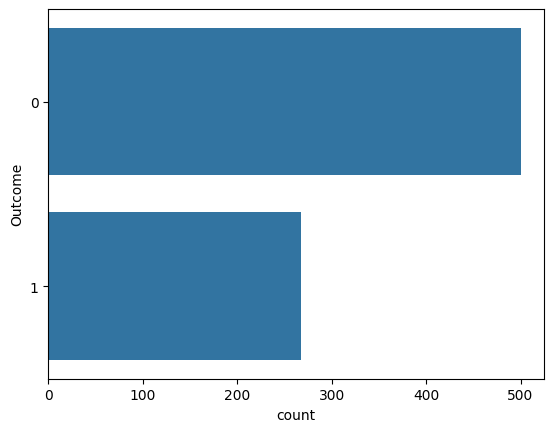

In [10]:
sns.countplot(data=df, y='Outcome')

Text(0.5, 0.98, 'Histogram of Pima Indian Diabetes Dataset Features')

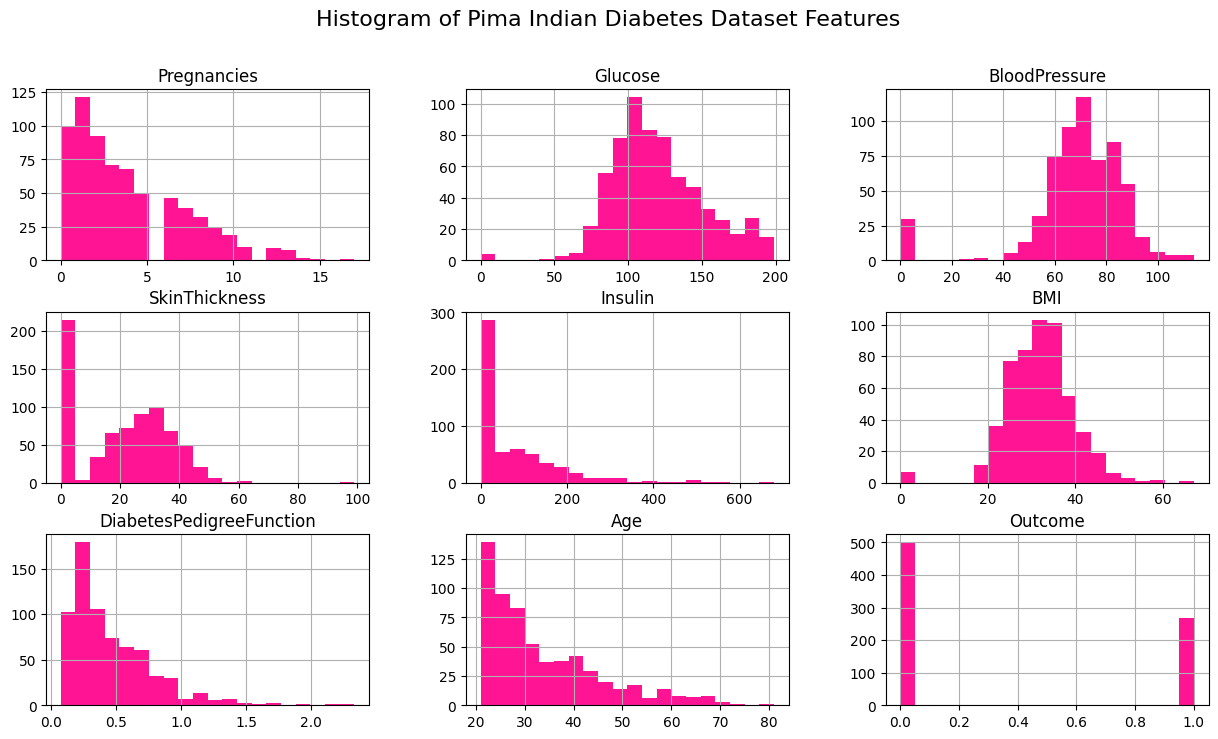

In [13]:
df.hist(bins=20, figsize=(15,8), layout=(3, 3),
        color='deeppink');
plt.suptitle('Histogram of Pima Indian Diabetes Dataset Features',
             fontsize=16)

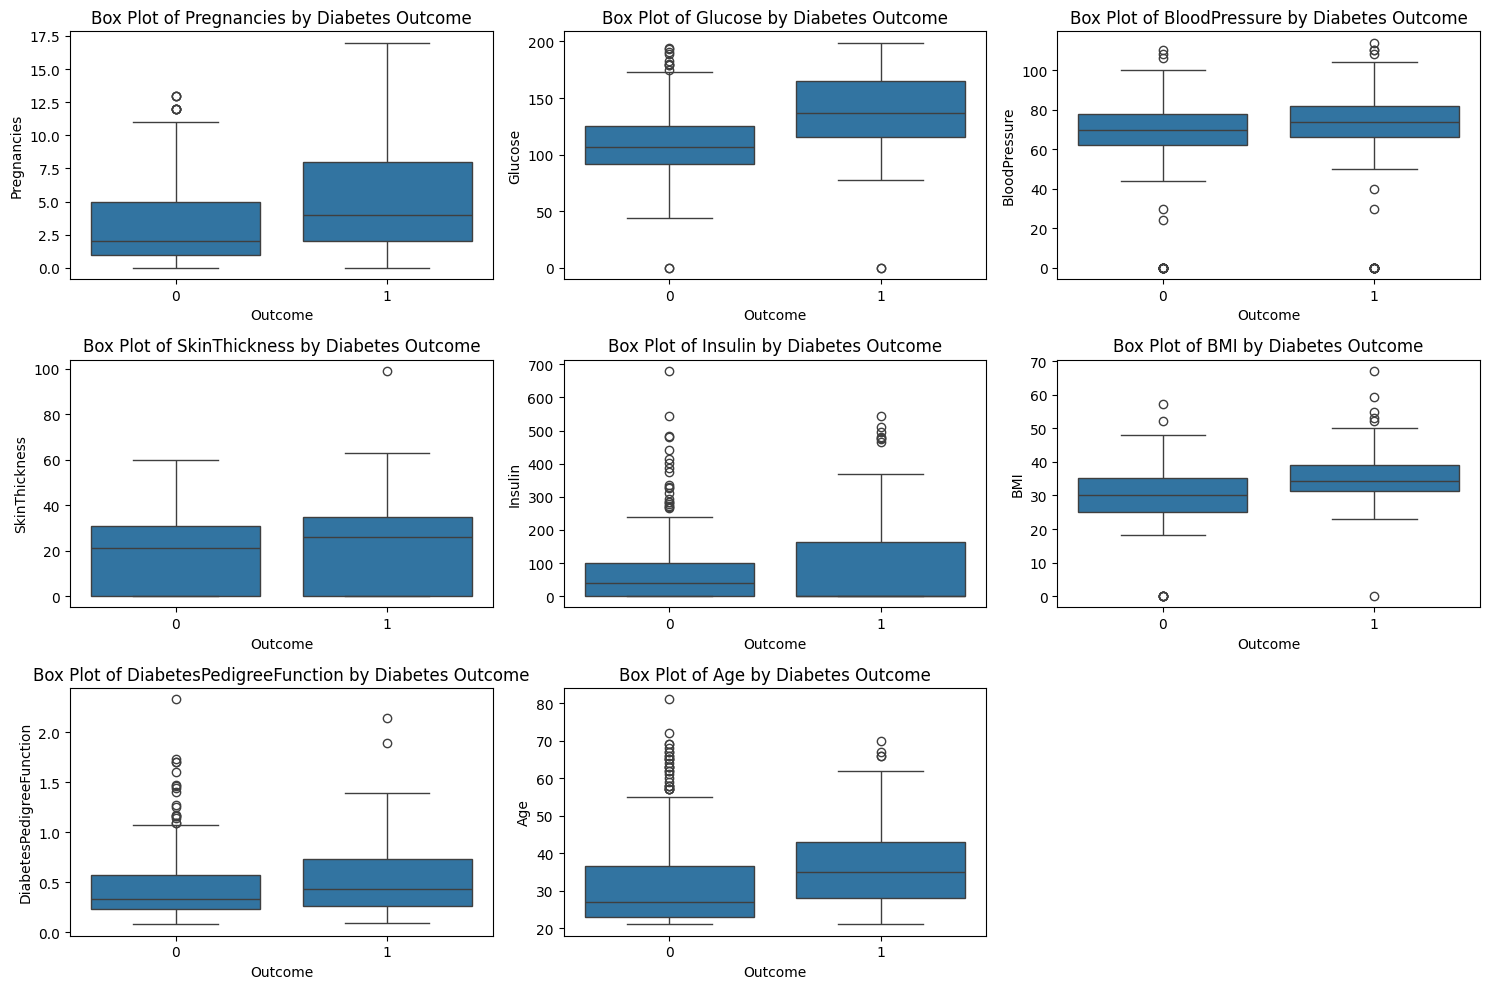

In [17]:
def plot_boxplots(data):
    plt.figure(figsize=(15, 10))
    for i, column in enumerate(data.columns[:-1]):
        plt.subplot(3, 3, i+1)
        sns.boxplot(x='Outcome', y=column,data=data)
        plt.title(f'Box Plot of {column} by Diabetes Outcome')
    plt.tight_layout()
    plt.show()
plot_boxplots(df)

<Axes: >

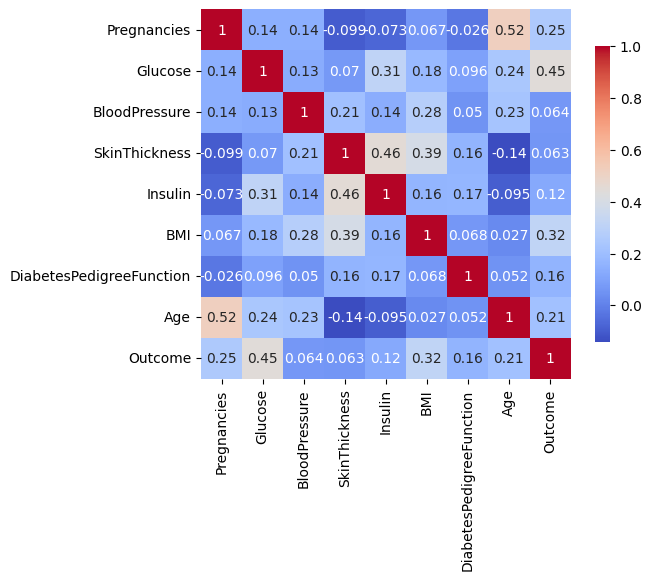

In [60]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm',
            square=True, cbar_kws={"shrink": .8})

In [19]:
df_text = pd.read_excel('C:/Users/azkaw/OneDrive/Documents/College/code/Infrastruktur dan Platform untuk Sains Data/foodreviews.xlsx')
df_text.head(3)

,ProductID,Helpfulness_Score,Rating,Review_Title,Text
0,CFB001E4K,1,5,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,CFB00813G,0,1,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,CFB000LQO,1,4,"""Delight"" says it all",This is a confection that has been around a fe...


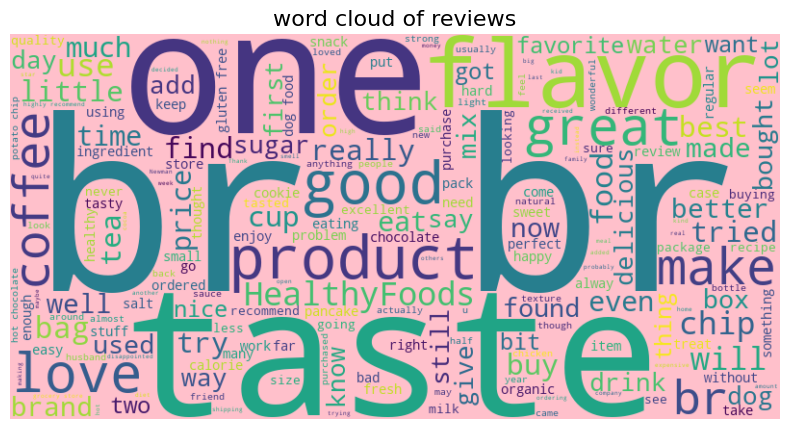

In [20]:
text = " ". join(review for review in df_text.Text)

def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400,
                          background_color='pink',
                          colormap='viridis').generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('word cloud of reviews', fontsize=16)
    plt.show()

plot_wordcloud(text)

In [21]:
imputer = KNNImputer(n_neighbors=5)
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [22]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [23]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
x=df.drop('Outcome', axis=1)
y=df['Outcome']

In [25]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

<Axes: xlabel='count', ylabel='Outcome'>

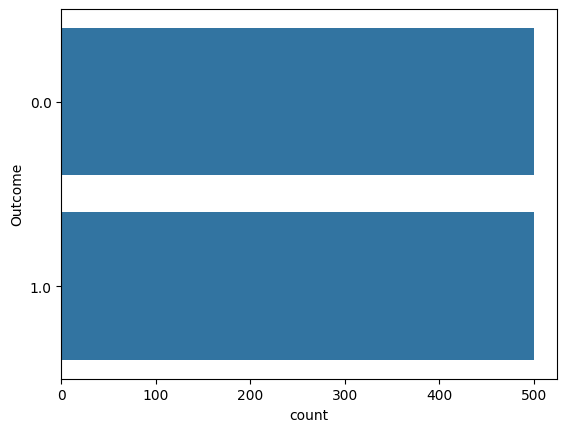

In [26]:
sns.countplot(data=x_resampled, y=y_resampled)

In [90]:
scaler = StandardScaler()
df = x_resampled.copy()
df[df.columns.difference(['Outcome'])] = scaler.fit_transform(df[df.columns.difference(['Outcome'])])

In [91]:
df.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.631452,1.341835,0.161894,0.908335,-0.76215,0.145083,0.509503,0.240117
1,-0.961083,-1.342873,-0.161927,0.524391,-0.76215,0.293467,-0.424487,-0.249300
2,1.268466,1.937693,-0.269867,-1.331339,-0.76215,-1.374370,0.661784,-0.151417
